In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from lc_video_phase_labeller import PhaseLabeller

In [2]:
model_load_dir = "C:/Users/Jason/Documents/University/Year_4/MPhys_project/Project_work/Data/I-N-Chol-Sm_dataset-balanced/Results/Old_smaller_dataset_model/Kaggle4_saved_model"
phase_list = ["Isotropic", "Nematic", "Cholesteric", "Smectic"]
vid_file = "M6/"
vid_name = "M6-Green_cooling_181-154C_10Cmin"
vid_path = "C:/Users/Jason/Documents/University/Year_4/MPhys_project/Project_work/Data/All_videos/" + vid_file + vid_name + ".avi"
save_dir = "C:/Users/Jason/Documents/University/Year_4/MPhys_project/Project_work/Data/I-N-Chol-Sm_dataset-balanced/Results/Old_smaller_dataset_model/Relabelled_test_videos/"
vid_save_path = save_dir + vid_name + "_labelled.avi" 
start_temp = 181
end_temp = 154
temp_rate = None

Model: "First_CNN_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 256, 256, 1)]     0         
_________________________________________________________________
Normalize (Rescaling)        (None, 256, 256, 1)       0         
_________________________________________________________________
random_flip_2 (RandomFlip)   (None, 256, 256, 1)       0         
_________________________________________________________________
random_rotation_2 (RandomRot (None, 256, 256, 1)       0         
_________________________________________________________________
random_zoom_2 (RandomZoom)   (None, 256, 256, 1)       0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 252, 252, 16)      416       
_________________________________________________________________
MaxPool1 (MaxPooling2D)      (None, 126, 126, 16)  

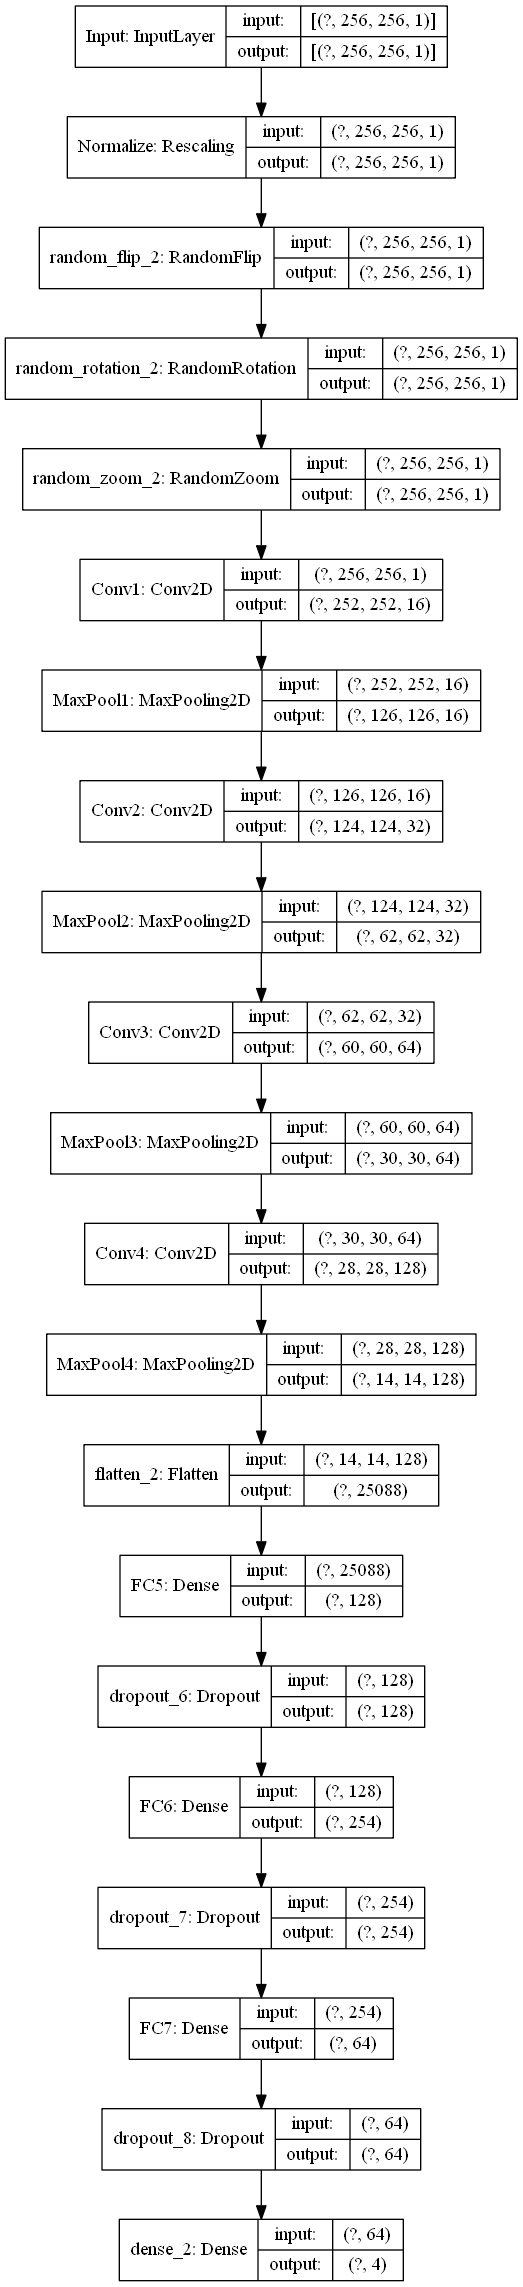

In [6]:
import tensorflow as tf
from keras import layers
from keras import Model
from keras.utils.vis_utils import plot_model

model_load_dir = "C:/Users/Jason/Documents/University/Year_4/MPhys_project/Project_work/Data/I-N-Chol-Sm_dataset-balanced/Results/Old_smaller_dataset_model/Kaggle4_saved_model"
phase_list = ["Isotropic", "Nematic", "Cholesteric", "Smectic"]

file_title = "First_CNN_model"

# Define model layers
# Input/preprocessing layers
input_layer = layers.Input(shape = (256,256,1), name="Input")
X = layers.experimental.preprocessing.Rescaling(1./255, 
                                                name="Normalize")(input_layer)
# Augmentation layers
X = layers.experimental.preprocessing.RandomFlip()(X)
X = layers.experimental.preprocessing.RandomRotation(0.2)(X) # rotate by 0.2*2pi
X = layers.experimental.preprocessing.RandomZoom(0.2)(X)

# Conv layers
X = layers.Conv2D(16, kernel_size=(5,5), activation="relu", name="Conv1")(X)
X = layers.MaxPooling2D(2,2, name="MaxPool1")(X)

X = layers.Conv2D(32, kernel_size=(3,3), activation="relu", name="Conv2")(X)
X = layers.MaxPooling2D(2,2, name="MaxPool2")(X)

X = layers.Conv2D(64, kernel_size=(3,3), activation="relu", name="Conv3")(X)
X = layers.MaxPooling2D(2,2, name="MaxPool3")(X)

X = layers.Conv2D(128, kernel_size=(3,3), activation="relu", name="Conv4")(X)
X = layers.MaxPooling2D(2,2, name="MaxPool4")(X)

# Fully connected layers
X = layers.Flatten()(X)

X = layers.Dense(units=128, activation="relu", name="FC5")(X)
X = layers.Dropout(0.5)(X)

X = layers.Dense(units=254, activation="relu", name="FC6")(X)
X = layers.Dropout(0.5)(X)

X = layers.Dense(units=64, activation="relu", name="FC7")(X)
X = layers.Dropout(0.5)(X)

# Output layer 
X = layers.Dense(units=4, activation="softmax")(X)

# Save a diagram of the model
model = Model(input_layer, X, name=file_title)


model.summary()
model_save_path = "C:/Users/Jason/Documents/University/Year_4/MPhys_project/Project_work/Data/I-N-Chol-Sm_dataset-balanced/Results/Old_smaller_dataset_model/" + file_title + ".png"
plot_model(model, to_file=model_save_path, 
           show_shapes=True, show_layer_names=True)

In [3]:
phase_vid_labeller = PhaseLabeller()
phase_vid_labeller.get_model(model_load_dir, phase_list)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 256, 256, 1)       0         
_________________________________________________________________
random_flip (RandomFlip)     (None, 256, 256, 1)       0         
_________________________________________________________________
random_rotation (RandomRotat (None, 256, 256, 1)       0         
_________________________________________________________________
random_zoom (RandomZoom)     (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 252, 252, 16)      416       
_________________________________________________________________
batch_normalization (BatchNo (None, 252, 252, 16)      64        
_________________________________________________________________
activation (Activation)      (None, 252, 252, 16)      0

In [4]:
phase_vid_labeller.label_video(vid_path,
                               vid_save_path,
                               start_temp,
                               end_temp=end_temp,
                               temp_rate_per_sec=temp_rate)

In [5]:
save_path = save_dir + vid_name + ".csv"
phase_vid_labeller.to_csv(save_path)

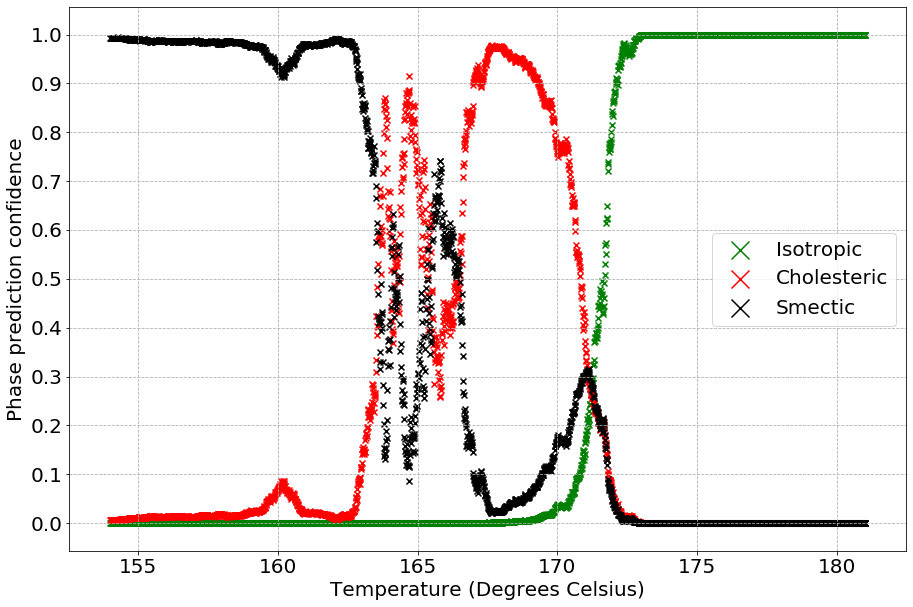

In [9]:
save_path = save_dir + vid_name + ".png"
#phase_plot_list = ["Isotropic", "Nematic", "Cholesteric", "Smectic"]
#phase_plot_list = ["Nematic", "Smectic"]
#phase_plot_list = ["Isotropic", "Nematic"]
phase_plot_list = ["Isotropic", "Cholesteric", "Smectic"]
#color_list = ["g", "b", "r", "k"]
#color_list = ["b", "k"]
#color_list = ["g", "b"]
color_list = ["g", "r", "k"]
phase_vid_labeller.conf_temp_plot(phase_plot_list,
                                  color_list,
                                  save_path,
                                  marker_size=3
                                 )

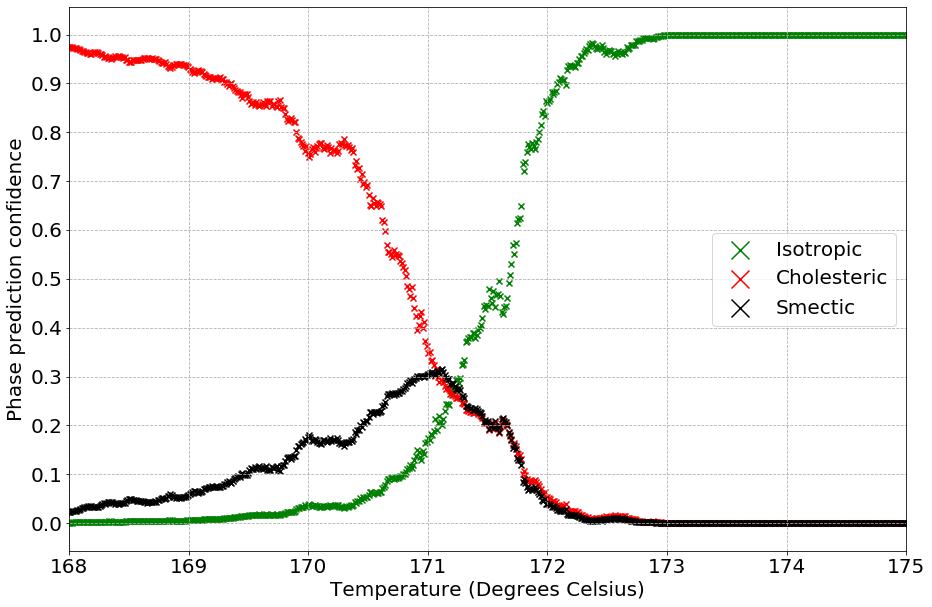

In [10]:
#phase_plot_list = ["Nematic", "Smectic"]
#color_list = ["b", "k"]
save_path = save_dir + vid_name + "-zoomed_in.png"
phase_vid_labeller.conf_temp_plot(phase_plot_list,
                                  color_list,
                                  save_path,
                                  start_temp=168,
                                  end_temp=175,
                                  marker_size=3
                                 )